In [1]:
import torch
import librosa
import librosa.display
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_noisy = "/Users/vedanshkumar/Documents/Fun_ml/Projects/AudioNoiseRemovalGAN/Dataset/voicebank-demand-16k/noisy_trainset_28spk_wav/p226_001.wav"
path_clean = "/Users/vedanshkumar/Documents/Fun_ml/Projects/AudioNoiseRemovalGAN/Dataset/voicebank-demand-16k/clean_trainset_28spk_wav/p226_001.wav"

In [3]:
aud_noisy = torchaudio.load(path_noisy)
aud_clean = torchaudio.load(path_clean)

In [4]:
aud_noisy
aud_clean

(tensor([[-0.0026, -0.0041, -0.0049,  ..., -0.0021, -0.0016, -0.0008]]), 16000)

In [5]:
aud_clean[0][0]
aud_noisy[0][0]

tensor([-0.0025, -0.0040, -0.0049,  ...,  0.0064,  0.0056,  0.0068])

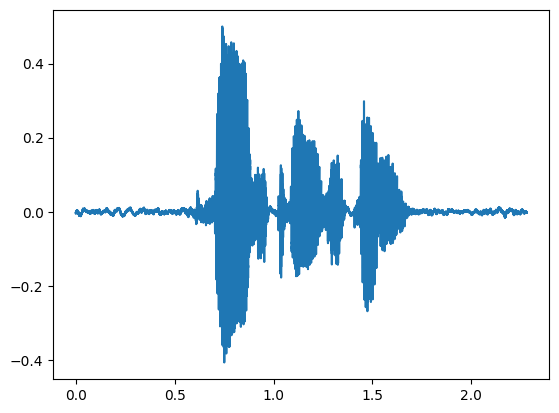

In [6]:
plt.plot(np.linspace(0,len(aud_clean[0][0])/aud_clean[1],num=len(aud_clean[0][0])),aud_clean[0][0])
plt.show()

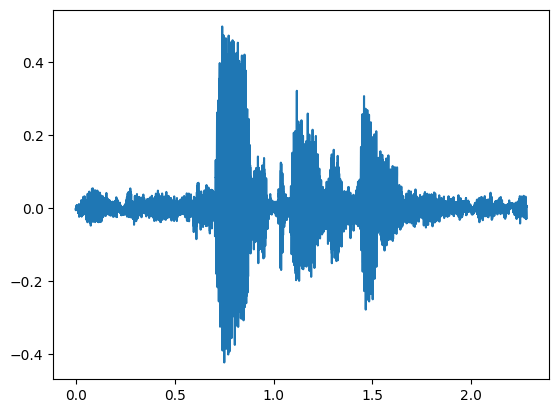

In [7]:
plt.plot(np.linspace(0,len(aud_noisy[0][0])/aud_noisy[1],num=len(aud_noisy[0][0])),aud_noisy[0][0])
plt.show()

In [8]:
spec = T.MelSpectrogram(n_fft=800)
spectrogram = spec(aud_noisy[0][0])
spectrogram.shape

torch.Size([128, 92])

In [9]:
y_n, s_n = librosa.load(path_noisy)
y_c, s_c = librosa.load(path_clean)

In [10]:
sn = librosa.feature.melspectrogram(y=y_n)
sc = librosa.feature.melspectrogram(y=y_c)

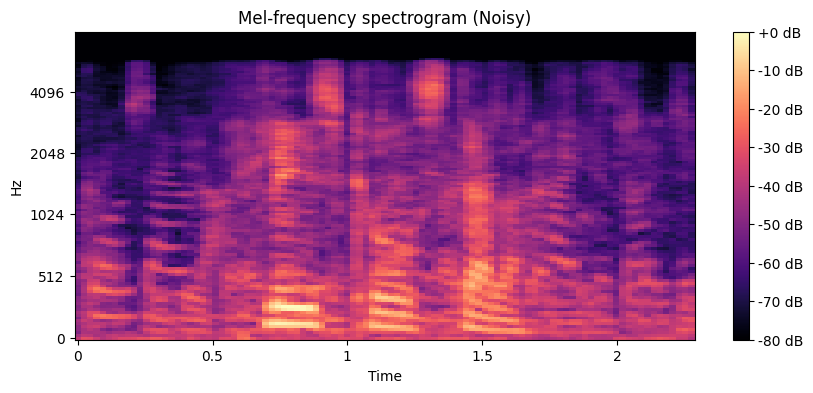

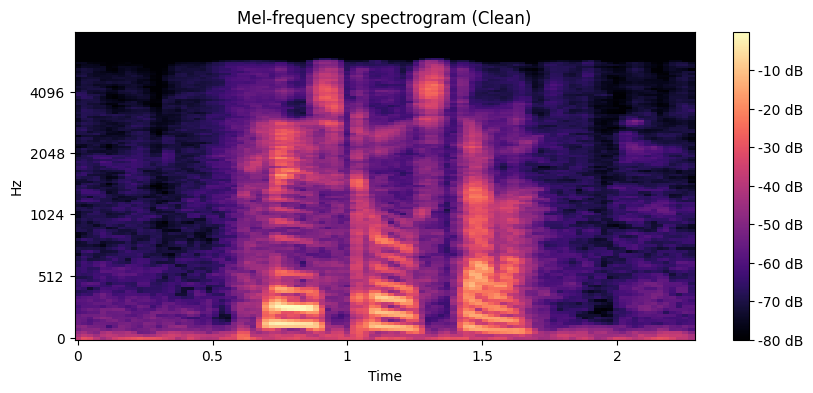

In [11]:
fig_1, ax_1 = plt.subplots(1, 1, figsize=(10, 4))
S_dB_1 = librosa.power_to_db(sn, ref=np.max)
img_1 = librosa.display.specshow(S_dB_1, x_axis='time', y_axis='mel', sr=s_n, fmax=8000, ax=ax_1)
fig_1.colorbar(img_1, ax=ax_1, format='%+2.0f dB')
ax_1.set(title='Mel-frequency spectrogram (Noisy)')

# Mel-frequency spectrogram for clean signal
fig_2, ax_2 = plt.subplots(1, 1, figsize=(10, 4))
S_dB_2 = librosa.power_to_db(sc, ref=np.max)
img_2 = librosa.display.specshow(S_dB_2, x_axis='time', y_axis='mel', sr=s_c, fmax=8000, ax=ax_2)
fig_2.colorbar(img_2, ax=ax_2, format='%+2.0f dB')
ax_2.set(title='Mel-frequency spectrogram (Clean)')

plt.show()

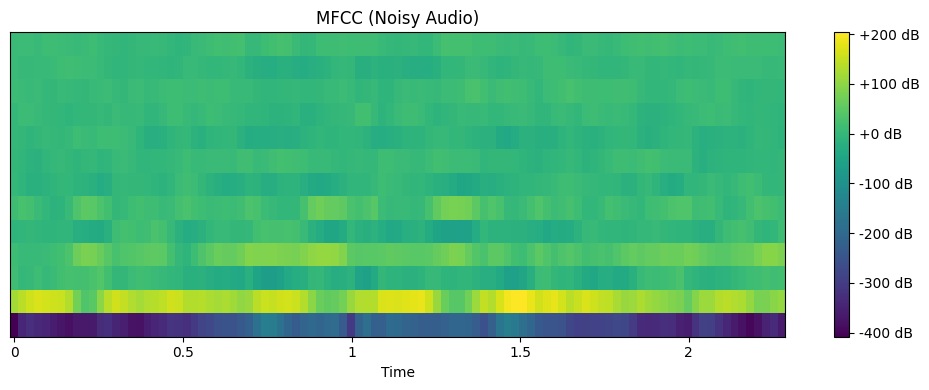

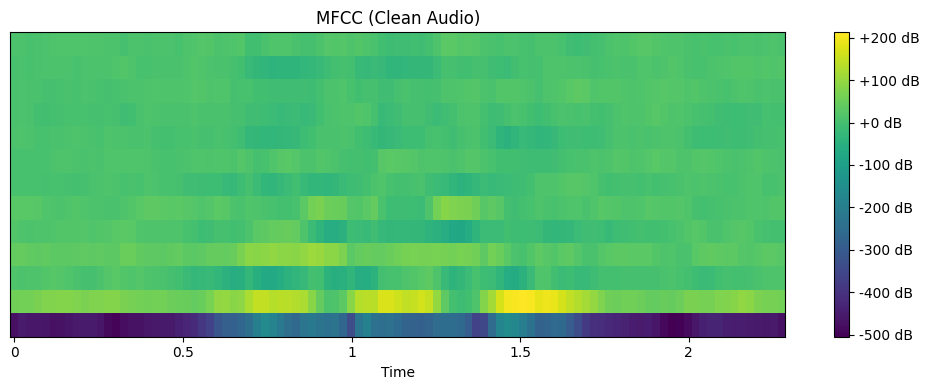

In [12]:
mfcc_noisy = librosa.feature.mfcc(y=y_n, sr=s_n, n_mfcc=13)

# Extract MFCCs for clean audio
mfcc_clean = librosa.feature.mfcc(y=y_c, sr=s_c, n_mfcc=13)

# Plot MFCCs for noisy audio
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_noisy, x_axis='time', sr=s_n, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (Noisy Audio)')
plt.tight_layout()
plt.show()

# Plot MFCCs for clean audio
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_clean, x_axis='time', sr=s_c, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (Clean Audio)')
plt.tight_layout()
plt.show()